<a href="https://colab.research.google.com/github/petermr/semanticClimate/blob/main/keyword_extraction/code/keyword_extraction_for_climate_justice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!git clone  https://github.com/petermr/semanticClimate.git

Cloning into 'semanticClimate'...
remote: Enumerating objects: 31782, done.
remote: Counting objects: 100% (27505/27505), done.
remote: Compressing objects: 100% (18275/18275), done.
remote: Total 31782 (delta 8779), reused 27105 (delta 8437), pack-reused 4277
Receiving objects: 100% (31782/31782), 357.20 MiB | 22.68 MiB/s, done.
Resolving deltas: 100% (11089/11089), done.
Checking out files: 100% (28254/28254), done.


In [1]:
%cd /content/semanticClimate/keyword_extraction/code/

[Errno 2] No such file or directory: '/content/semanticClimate/keyword_extraction/code/'
/Users/pm286/projects/semanticClimate/keyword_extraction/code


In [2]:
!pip install -r requirement.txt

  Cloning https://github.com/LIAAD/yake to /private/var/folders/ft/7j605bsd10l0ftqygyxjjflh0000gq/T/pip-req-build-0jgdys0_
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /private/var/folders/ft/7j605bsd10l0ftqygyxjjflh0000gq/T/pip-req-build-0jgdys0_
  Resolved https://github.com/LIAAD/yake to commit 8d71d94ded93fb77f1361f62e5264f19b9c91cd7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 16.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached rich-12.6.0-py3-none-any.whl (237 kB)
  Using cached commonmark-0.9.1

  Using cached sentencepiece-0.1.97-cp38-cp38-macosx_10_9_x86_64.whl (1.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 23.1 MB/s eta 0:00:0000:0100:01
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=e932fad78d808a9fa9125ad56b32b43c1778ee79d4113e4d52706bdf8ff570b6
  Stored in directory: /Users/pm286/Library/Caches/pip/wheels/89/6f/00/333f55b93ceb6bee2edd1357f2b12b84424ef387a811fbd0d7
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23776 sha256=b6cadf5c0f8c32d1aa4a809704245f423604816d0feef7b40a20f78662688058
  Stored in directory: /Users/pm286/Library/Caches/pip/wheels/44/5f/14/7d63eeb355b1d69553ffb45ad33783042c2fe0c92d9f7f2bd5
  Created wheel for pycld2: filename=pycld2-0.41-cp38-cp38-macosx_10_9_x86_64.whl size=4779190 sha256=0a9a3846c488398f2c27b623b3c3b272bb531aea6cf05bdecaa482a77ca09727
  Stored in directory: /Users/pm286/Libra

In [4]:
!python -m spacy download en_core_web_lg

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.0.0/en_core_web_lg-3.0.0-py3-none-any.whl (778.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [5]:
!mkdir output

In [12]:
from keyword_extraction import keyword_extraction

import os
import glob
!pwd
files_html = glob.glob('../../climate_justice/*/*larly.html',recursive=True)

/Users/pm286/projects/semanticClimate/keyword_extraction/code


In [13]:
len(files_html)

184

In [14]:
text = ''
for f in files_html:
  text += keyword_extraction(f,'ddd','g').extract_text_fom_html()
  text +='\n'

In [19]:
from gensim.summarization import keywords
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_lg")

def tagger(x):
        return nlp(x)[0].pos_

def lemma(x): 
  return nlp(x)[0].lemma_ 

def clean(df):
    df['POS']= df['keyword/phrase'].apply(lambda x: tagger(x))
    df['Lemma']= df['keyword/phrase'].apply(lambda x: lemma(x))
    df= df[df['keyword/phrase'] == df['Lemma'] ]
    df = df.drop_duplicates(subset=['score'], keep='last')
    df= df[df.POS.isin(['NOUN', 'PROPN', 'ADJ', 'ADV'])]
    df= df[~df['keyword/phrase'].apply(lambda x: lemma(x)).isin(['org', 'www', 'amp', 'http','https', 'publication','Chapter'])]
    df = df.drop(columns = ['Lemma'], axis = 0)
    return df

In [20]:
keywords_gensim= keywords(text, words = 100,scores = True, pos_filter =('NN','ADJ'),lemmatize = False, deacc =False) # run over all parameters 
df_gensim =pd.DataFrame(keywords_gensim)
df_gensim.rename(columns = {0:'keyword/phrase',1:'score'}, inplace = True)
df_gensim = clean(df_gensim)

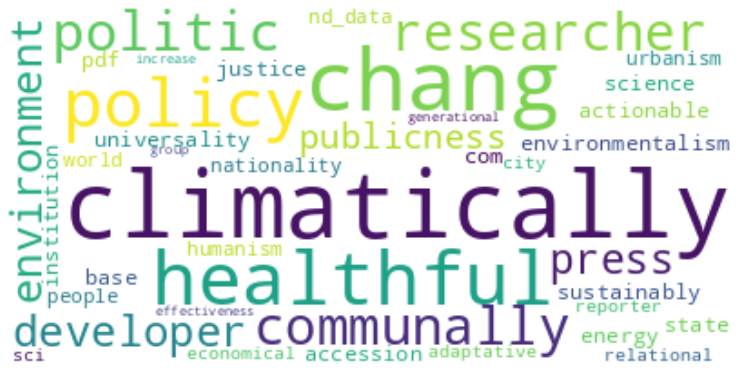

/var/folders/ft/7j605bsd10l0ftqygyxjjflh0000gq/T/ipykernel_36685/2804037500.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [21]:
from wordcloud import WordCloud
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
### save where ever you want 
saving_path = "/Users/pm286/projects/semanticClimate/"
dict_ ={df_gensim.iloc[w]['keyword/phrase']:df_gensim.iloc[w]['score'] for w in range(df_gensim.head(40).shape[0]) }


# for chp_name in tf_idf_gensim_dict.keys()
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict_) 
fig = plt.figure(figsize=(13,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.show()
fig.savefig(saving_path+ f'/_word_cloud.jpg', bbox_inches='tight', dpi=150)